# Overview

This week we'll get started on modern network science. We'll focus on two key results that kick-started a revolution in our understanding of networks.

* Problems with random networks as models for real networks and the Watts-Strogatz model
* Scale-free networks and the Barabasi-Albert model

But before we can get started, I will talk about a few admin things. 

And the good news is that after today, we can take it easy with admin stuff for a while. We'll restart this aspect when we get closer to the project assignments that we finish the class with.

# Part 1: Small world networks

Once again, we'll start with some lecturing. So it's time to watch a little video to get you started.

> **_Video Lecture_**: Some properties of real world networks. Clustering and small paths. The Watts-Strogatz model. 
> 

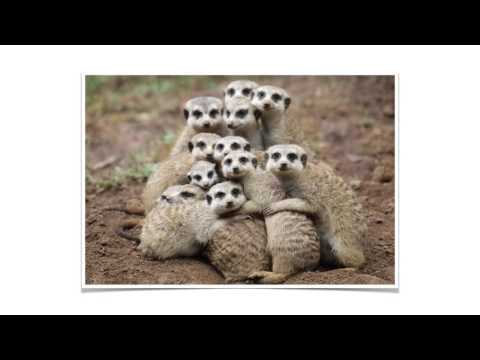

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("tMLJ2NYI1FU",width=800, height=450)

Next up is fun with reading the textbook. There's lots of goodies left in Chapter 3 that covers the stuff I've just covered in the video from a slightly different angle. 
> 
> *Reading*: For this part, we'll read the remaining part of *Network Science* Chapter 3, Section 3.5 - 3.10, with ***emphasis*** on 3.8 and 3.9\.
> 


> *Exercises*: Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook. 
> 
> * What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?

"Taken together, in a random society all individuals are expected to have a comparable number of friends. Hence if people are randomly connected to each other, we lack outliers: There are no highly popular individuals, and no one is left behind, having only a few friends."


> * List the four regimes that characterize random networks as a function of $\langle k \rangle$.

1. Subkritisk regime: 0 < k < 1 
I dette regime består netværket af mange små, isolerede komponenter, og der er ikke nogen gigantisk komponent.

2. Kritisk punkt: k = 1
Ved dette punkt er der stadig ikke nogen gigantisk komponent, men den største komponent vokser meget hurtigt.

3. Superkritisk regime: k > 1
I dette regime opstår der en gigantisk komponent, som indeholder en endelig andel af alle knuderne. Der eksisterer dog stadig mange små, isolerede komponenter.

4. Forbundet regime: k > ln(N)
I dette regime er alle knuderne forbundet i én enkelt komponent, og der er ikke længere nogen isolerede komponenter.



> * According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering $C(k)$ decreases as a function of $k$ in real-world networks?

"In a random network the local clustering coefficient is independent of the node’s degree and ‹C› depends on the system size as 1/N. In contrast, measurements indicate that for real networks C(k) decreases with the node degrees and is largely independent of the system size"


<div class="alert alert-block alert-info">
For all of the reading questions I recommend not using a LLM. The questions are designed to make sure you actually read and understand the text.
</div>

The next set of exercises departs from the book by presenting a little study of the Watts-Strogatz (WS) model. We're going to see just how few random links the WS model needs to dramatically shorten the path-lengths in the network. And while doing that, we'll practice using `networkx`, writing loops, and plotting nice figures.

> *Exercises*: WS edition.
> 
> * First, let's use `networkx` to play around with WS graphs. Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1,$ and  $1$. Calculate the average shortest path length $\langle d \rangle$ for each one. 
> * Describe what happens to the network when $p = 1$.

<div class="alert alert-block alert-info">
Again, I hope you will try solving the coding part of this on your own - especially the part that draws on NetworkX. The whole idea is to connect concepts from the literature to real-world code. And that learning happens when you try it on your own. I also recommend you do the loops on your own. It's OK to use LLMs to style the plot. 
</div>




Summary of average shortest path lengths:
Rewiring probability p=0: ⟨d⟩ = 62.875751503006015
Rewiring probability p=0.1: ⟨d⟩ = 7.49172745490982
Rewiring probability p=1: ⟨d⟩ = 4.767006012024048


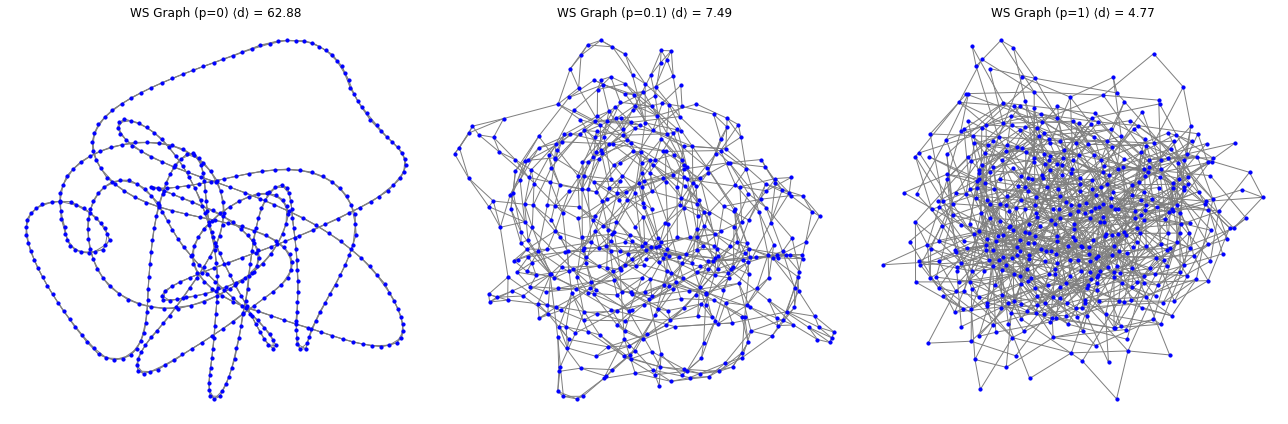

In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 500  # Number of nodes
k = 4    # Average degree
ps = [0, 0.1, 1]  # Rewiring probabilities

# Initialize lists to store average shortest path lengths
avg_shortest_path_lengths = []

# Set up figure for subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
layout = nx.spring_layout  # You can also try nx.circular_layout for a different view


for i, p in enumerate(ps):

    # Generate WS graph
    G = nx.watts_strogatz_graph(n, k, p)
    
    # Calculate average shortest path length
    if nx.is_connected(G):
        avg_path_length = nx.average_shortest_path_length(G)
    else:
        avg_path_length = float('inf')  # In case the graph is not connected
    
    avg_shortest_path_lengths.append(avg_path_length)

    # Draw the graph on the ith subplot
    ax = axes[i]
    ax.set_title(f"WS Graph (p={p}) ⟨d⟩ = {avg_path_length:.2f}")
    nx.draw(G, pos=layout(G), node_size=10, ax=ax, node_color='blue', edge_color='gray')


# Output average shortest path lengths
print("\nSummary of average shortest path lengths:")
for p, length in zip(ps, avg_shortest_path_lengths):
    print(f'Rewiring probability p={p}: ⟨d⟩ = {length}')

# Show the plot
plt.tight_layout()
plt.show()

In summary, the variable p controls how much randomness is introduced into the network, ranging from a regular structure (at p = 0) to a fully random network (at p = 1).

The lengths of paths:

* p = 0: In a regular lattice, there are no shortcuts, so the average distance between nodes is large.
* p = 0.1: Here, 10% of the edges in the regular lattice are randomly rewired. This introduces shortcuts between distant nodes, greatly reducing the average shortest path length.
* p = 1: In a fully random network, the average shortest path length is minimized, but clustering is typically low.


> * Generate a lot of networks with different values of $p$. You will notice that paths are short when $p$ is close to one and they are long when $p = 0$. What's the value of $p$ for which the average shortest path length gets close to the short paths we find in a fully randomized network.

In [6]:
import networkx as nx
import numpy as np

# Parameters
n = 500  # Number of nodes
k = 4    # Average degree
ps = [0, 0.01,0.05,0.1,0.2,0.5,0.75, 1]  # Rewiring probabilities

# Initialize lists to store average shortest path lengths
avg_shortest_path_lengths = []



for p in ps:

    # Generate WS graph
    G = nx.watts_strogatz_graph(n, k, p)
    
    # Calculate average shortest path length
    if nx.is_connected(G):
        avg_path_length = nx.average_shortest_path_length(G)
    else:
        avg_path_length = float('inf')  # In case the graph is not connected
    
    avg_shortest_path_lengths.append(avg_path_length)

# Output average shortest path lengths
print("\nSummary of average shortest path lengths:")
for p, length in zip(ps, avg_shortest_path_lengths):
    print(f'Rewiring probability p={p}: ⟨d⟩ = {length}')




Summary of average shortest path lengths:
Rewiring probability p=0: ⟨d⟩ = 62.875751503006015
Rewiring probability p=0.01: ⟨d⟩ = 34.742941883767536
Rewiring probability p=0.05: ⟨d⟩ = 10.127567134268537
Rewiring probability p=0.1: ⟨d⟩ = 7.602813627254509
Rewiring probability p=0.2: ⟨d⟩ = 6.328905811623247
Rewiring probability p=0.5: ⟨d⟩ = 5.026268537074149
Rewiring probability p=0.75: ⟨d⟩ = 4.807799599198397
Rewiring probability p=1: ⟨d⟩ = 4.739118236472946


Around p = 0.1 or 0.2, we start having a shortest path length that somewhat is the same size as of p = 1. It is quickly descending when increasing p from 0.

> * Let's investigate this behavior in detail. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add [errorbars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) to the plot. My version of the plot is below (since a picture's worth 1000 words).

![Sune's version](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/ws.png)



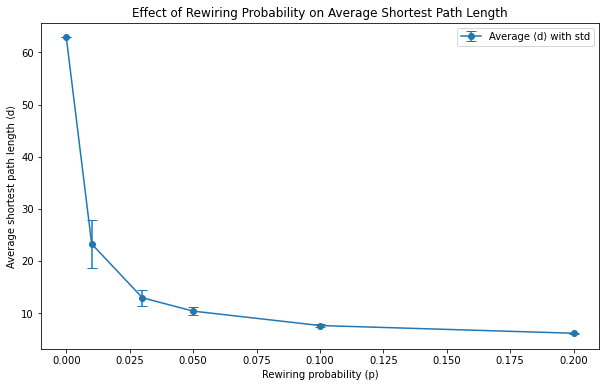


Summary of average shortest path lengths with standard deviation:
Rewiring probability p=0: ⟨d⟩ = 62.87575150300602, Std Dev = 7.105427357601002e-15
Rewiring probability p=0.01: ⟨d⟩ = 23.263384048096192, Std Dev = 4.553822391141086
Rewiring probability p=0.03: ⟨d⟩ = 12.933971623246494, Std Dev = 1.5757585914190624
Rewiring probability p=0.05: ⟨d⟩ = 10.369943086172343, Std Dev = 0.6944723967662368
Rewiring probability p=0.1: ⟨d⟩ = 7.60219254509018, Std Dev = 0.24374074309205523
Rewiring probability p=0.2: ⟨d⟩ = 6.122750460921843, Std Dev = 0.13945508498289275


In [8]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 500  # Number of nodes
k = 4    # Average degree
ps = [0, 0.01, 0.03, 0.05, 0.1, 0.2]  # Rewiring probabilities
num_trials = 50  # Number of networks to generate for each p

# Initialize lists to store the average and std deviation of shortest path lengths
avg_shortest_path_lengths = []
std_shortest_path_lengths = []

# Loop over each rewiring probability p
for p in ps:
    path_lengths = []
    
    # Generate 50 networks for each p
    for _ in range(num_trials):
        G = nx.watts_strogatz_graph(n, k, p)
        
        # Calculate the average shortest path length for each network
        if nx.is_connected(G):
            avg_path_length = nx.average_shortest_path_length(G)
        else:
            avg_path_length = float('inf')  # Handle disconnected graphs
        
        path_lengths.append(avg_path_length)
    
    # Compute the mean and standard deviation for the 50 trials
    avg_shortest_path_lengths.append(np.mean(path_lengths))
    std_shortest_path_lengths.append(np.std(path_lengths))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.errorbar(ps, avg_shortest_path_lengths, yerr=std_shortest_path_lengths, fmt='-o', capsize=5, label='Average ⟨d⟩ with std')

# Customize the plot
plt.xlabel('Rewiring probability (p)')
plt.ylabel('Average shortest path length ⟨d⟩')
plt.title('Effect of Rewiring Probability on Average Shortest Path Length')
plt.grid(False)
plt.legend()
plt.show()

# Output average and standard deviation of shortest path lengths
print("\nSummary of average shortest path lengths with standard deviation:")
for p, mean_length, std_length in zip(ps, avg_shortest_path_lengths, std_shortest_path_lengths):
    print(f'Rewiring probability p={p}: ⟨d⟩ = {mean_length}, Std Dev = {std_length}')



> * Imagine that you put this plot in an assignment. Write a figure caption that explains to the reader what the plot shows (which variables, etc) and what's interesting about it.

## Part 2: Scale-free networks

The text book uses two whole chapters on the scale free property. We'll try and power through during the remainder of this lecture. As always, let's start by getting my take on the whole thing.

> **_Video Lecture_**: The scale free property and the Barabasi-Albert Model. 
> 

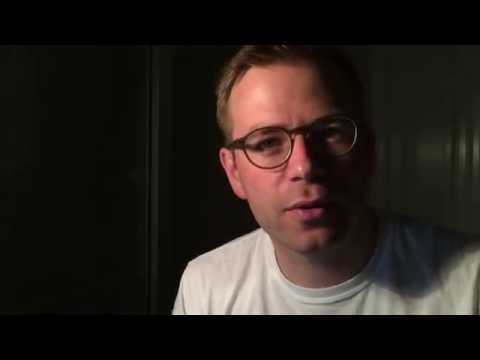

In [3]:
YouTubeVideo("myLgzbXxhOQ",width=800, height=450)

And now it's time for you guys to read. Recall that Barabasi (who wrote the textbook) discovered power-laws.

> *Reading*: Now we dig into the extended history and and theory behind Scale-Free networks and the Barabasi-Albert Model.
> 
> * Chapter 4, Section 4.1 - 4.7\.
> * Chapter 5, section 5.1 - 5.5\.
> 

Notes on scale-free vs poisson distributed networks:
* "In summary the key difference between a random and a scale-free network is rooted in the different shape of the Poisson and of the power-law function: In a random network most nodes have comparable degrees and hence hubs are forbidden. Hubs are not only tolerated, but are expected in scale-free networks (Image 4.6). Furthermore, the more nodes a scalefree network has, the larger are its hubs. Indeed, the size of the hubs grows polynomially with network size, hence they can grow quite large in scalefree networks. In contrast in a random network the size of the largest node grows logarithmically or slower with N, implying that hubs will be tiny even in a very large random network."
* The smaller is γ, the shorter are the distances between the nodes.
* Only for γ › 3 we recover the lnN dependence, the signature of the small-world property characterizing random networks


Notes on real vs random networks:
* Growth: Real networks are the result of a growth process that continuously increases N. In contrast the random network model assumes that the number of nodes, N, is fixed.
* Preferential Attachment: In real networks new nodes tend to link to the more connected nodes. In contrast nodes in random networks randomly choose their interaction partners.


> *Exercises*: BA edition.
> 
> First a couple of questions to make sure that you've actually read the text.
> 
> * What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).

* Anomalous Regime (γ≤ 2): Here the exponent 1/(γ-1) is larger than 1, meaning the number of links connected to the largest hub grows faster than the size of the network. Kmax grows faster than N. No large scale networks can exist. k diverges. d is app. constant.
* Scale-Free Regime (2 ‹ γ ‹ 3): These networks are ultra-small, meaning that the distance between nodes is very short. The degree of the largest hub 𝑘max grows with the size of the network, but at a slower rate, with the fraction of nodes connected to the largest hub decreasing as N increases
* Random Network Regime (γ › 3): Both the first and second moments of the degree distribution are finite, meaning that the network's properties are similar to those of a random network. The average distance between nodes follows the small-world formula, as seen in random networks. Hubs are small and less numerous, so the network’s degree distribution decays quickly.


> * What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.
* Sublinear Regime (0 < α < 1): "The degree distribution follows the stretched exponential (5.23), resulting in fewer and smaller hubs than in a scale-free network. As α → 1 the cutoff length increases and pk follows a power law over an increasing range of degrees."
* Linear Regime (α=1): "This corresponds to the Barabási-Albert model, hence the degree distribution follows a power law."
* Superlinear Regime (α > 1): "The high-degree nodes are disproportionately attractive. A winner-takes-all dynamics leads to a hub-and-spoke topology. In this configuration the earliest nodes become super hubs and all subsequent nodes link to them. The degree distribution, shown for α=1.5 indicates the coexistence of many small nodes with a few super hubs in the vicinity of k=104."




> We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success:
> 
> * First create a graph consisting of a single link. (You can call the nodes anything, but I would simply use integers as names).


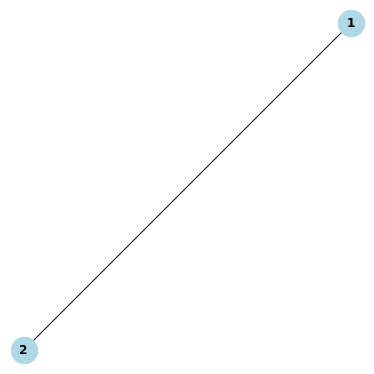

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Create a graph with a single link (2 nodes connected by an edge)
G = nx.Graph()

# Add two nodes and a single link between them
G.add_edge(1, 2)

# Draw the graph to visualize the result
plt.figure(figsize=(5, 5))
nx.draw(G, with_labels=True, node_color='lightblue', font_weight='bold', node_size=700)
plt.show()


> * Now add another node, connecting one of the existing nodes in proportion to their degree.
> * Keep going until you have a 100 node network.
>   * *Hint*: The difficult part here is connecting to each node according to their degree. The way I do it is: generate a list of all edges (e.g. pairs of nodes), then flatten it (e.g. remove connection information). That list contains each node in proportion to its connections, thus drawing a random node from that list (e.g. using `random.choice`) corresponds to selecting a node with probability proportional to it's degree.
> * Plot the network. 


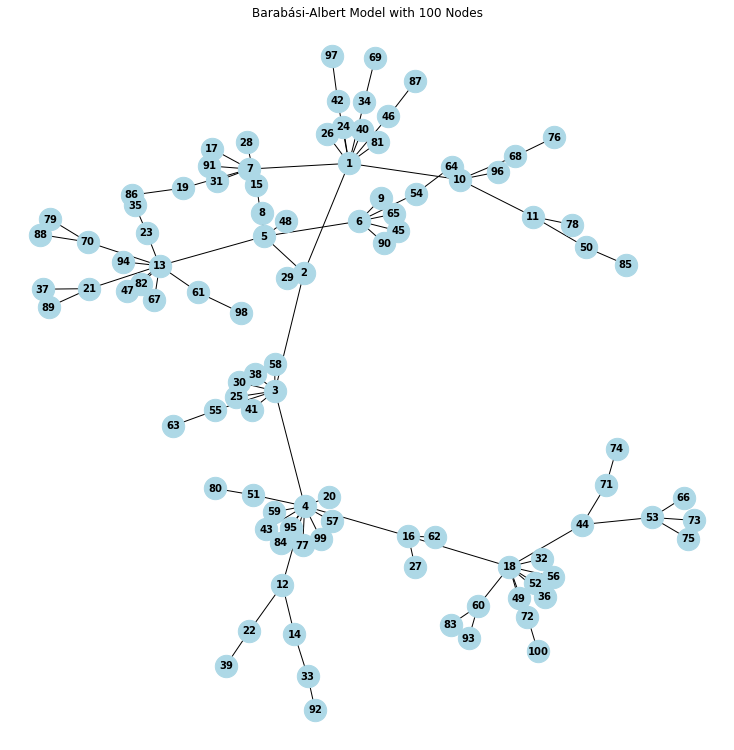

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Initialize the graph with a single edge
G = nx.Graph()
G.add_edge(1, 2)

# Define the total number of nodes
total_nodes = 100

# Function to create a list of nodes where each node appears proportionally to its degree
def generate_node_list(graph):
    node_list = []
    for node, degree in graph.degree():
        node_list.extend([node] * degree)
    return node_list

# Add nodes to the graph
while len(G.nodes) < total_nodes:
    # Create a new node with a unique label
    new_node = len(G.nodes) + 1
    
    # Generate a list of nodes where each node appears proportionally to its degree
    node_list = generate_node_list(G)
    
    # Choose a node to connect to based on the degree distribution
    target_node = random.choice(node_list)
    
    # Add the new node and connect it to the selected node
    G.add_edge(new_node, target_node)

# Draw the final graph with 100 nodes
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_color='lightblue', font_weight='bold', node_size=500, font_size=10)
plt.title("Barabási-Albert Model with 100 Nodes")
plt.show()


> * Add more nodes until you have a 5000 node network.
> * What's the maximum and minimum degree?


In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Initialize the graph with a single edge
G = nx.Graph()
G.add_edge(1, 2)

# Define the total number of nodes
total_nodes = 5000

# Function to create a list of nodes where each node appears proportionally to its degree
def generate_node_list(graph):
    node_list = []
    for node, degree in graph.degree():
        node_list.extend([node] * degree)
    return node_list

# Add nodes to the graph
while len(G.nodes) < total_nodes:
    # Create a new node with a unique label
    new_node = len(G.nodes) + 1
    
    # Generate a list of nodes where each node appears proportionally to its degree
    node_list = generate_node_list(G)
    
    # Choose a node to connect to based on the degree distribution
    target_node = random.choice(node_list)
    
    # Add the new node and connect it to the selected node
    G.add_edge(new_node, target_node)

# Calculate maximum and minimum degrees
degrees = dict(G.degree())
max_degree = max(degrees.values())
min_degree = min(degrees.values())

# Output maximum and minimum degrees
print(f"Maximum degree: {max_degree}")
print(f"Minimum degree: {min_degree}")

Maximum degree: 105
Minimum degree: 1


> * Now, bin the degree distribution using `numpy.histogram`.
> * Plot the distribution. Plot it with both linear and log-log axes.
> 
> ![Sune's version](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/ba.png)

<div class="alert alert-block alert-info">
As above, I recommend you try this on your own. It's so cool to experience that you can actually code up a BA network on your own ... and that it's not that difficult. See if you can figure out how to do the plotting and get the bins right (remember last week's exercise), and as always, it's OK to ask your LLM for help with the styling. 
</div>

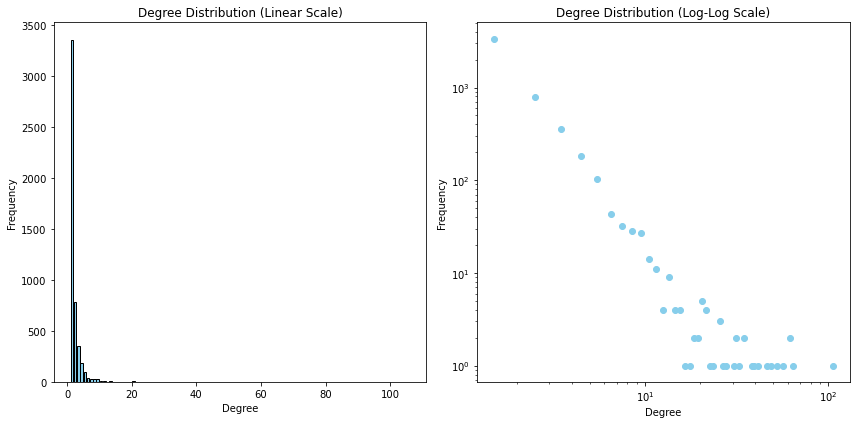

In [12]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# (Assuming the graph G has already been created with 5000 nodes)

# Calculate the degree of each node
degrees = [degree for node, degree in G.degree()]

# Bin the degree distribution using numpy.histogram
bin_counts, bin_edges = np.histogram(degrees, bins=range(1, max(degrees) + 2))

# Calculate the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot the degree distribution with linear axes
plt.figure(figsize=(12, 6))

# Linear plot
plt.subplot(1, 2, 1)
plt.bar(bin_centers, bin_counts, width=0.8, color='skyblue', edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution (Linear Scale)')

# Log-log plot
plt.subplot(1, 2, 2)
plt.loglog(bin_centers, bin_counts, 'o', color='skyblue')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution (Log-Log Scale)')

plt.tight_layout()
plt.show()


Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ has fewer friends than their friends have, on average\*. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated (let's call this network **F-BA** for *friendship BA*). Do the following:

> A. The friendship paradox in BA networks
> * Pick a node $i$ at random (e.g. use `random.choice`). [Find its degree](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.degree.html).
> * Find $i$'s [neighbors](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.Graph.neighbors.html?highlight=neighbors#networkx.Graph.neighbors). And calculate their average degree.
> * Compare the two numbers to check if it's true that $i$'s friends (on average) have more friends than $i$.
> * Do this 1000 times. How many out of those 1000 times is the friendship paradox true in **F-BA**?



In [18]:
# Pick a random node
random_node = random.choice(list(G.nodes))

# Find the degree of the selected node
node_degree = G.degree(random_node)

# Output the result
print(f"Randomly selected node: {random_node}")
print(f"Degree of node {random_node}: {node_degree}")


# Find the neighbors and calculate their average degree
neighbor_degrees = [G.degree(neighbor) for neighbor in G.neighbors(random_node)]
average_neighbor_degree = sum(neighbor_degrees) / len(neighbor_degrees) if neighbor_degrees else 0
print(f"Neighbors of node {random_node}: {[n for n in G.neighbors(random_node)]}")
print(f"Average degree of neighbors: {average_neighbor_degree:.2f}")


Randomly selected node: 1256
Degree of node 1256: 2
Neighbors of node 1256: [320, 4826]
Average degree of neighbors: 2.50


In [19]:
############ 1000 times F BA ###########
import networkx as nx
import random

# (Assuming the graph G has already been created with 5000 nodes)

# Number of iterations
num_iterations = 1000
count_higher_neighbor_degrees = 0

for _ in range(num_iterations):
    # Pick a random node
    random_node = random.choice(list(G.nodes))
    
    # Find the degree of the selected node
    node_degree = G.degree(random_node)
    
    # Find the neighbors and calculate their average degree
    neighbor_degrees = [G.degree(neighbor) for neighbor in G.neighbors(random_node)]
    average_neighbor_degree = sum(neighbor_degrees) / len(neighbor_degrees) if neighbor_degrees else 0
    
    # Check if the average neighbor degree is greater than the node degree
    if average_neighbor_degree > node_degree:
        count_higher_neighbor_degrees += 1

# Output the result
print(f"Out of {num_iterations} iterations, neighbors had a higher average degree than the node {count_higher_neighbor_degrees} times.")


Out of 1000 iterations, neighbors had a higher average degree than the node 866 times.


> B. The friendship paradox more generally
> * What if the power law is flatter, e.g. $p(k) \sim k^{-\gamma}$ with $\gamma = 2$? Will the fraction of times the paradox is true be higher or lower? 
>  - First answer this question by simply reasoning. Think about what it would mean in terms of hubs that the power law is flatter?

* The fraction of times the friendship paradox is true will be higher because nodes will more frequently have neighbors with higher degrees due to the increased presence of hubs. If the power law is flatter with 𝛾 = 2, the distribution of degrees has more nodes with high degrees compared to a steeper power law. 

>  - Now simulate a new network with the slope mentioned above. You can generate networks with power-law degree distributions using the [configuation model](https://en.wikipedia.org/wiki/Configuration_model). The `networkx` funtion is here [`nx.configuration_model`](https://networkx.org/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html). I suggest you make the network pretty big ... let's say 5000 nodes or more.
>     * Hint 0: In the `networkx` function mentioned above, you need a degree sequence. This can be created using the so-called transformation method. If we can generate a random real number $r$ uniformly distributed in the range $0 \leq r < 1$, then $x = x_{\textrm{min}}(1 – r)^{-1/\alpha - 1}$ is a random power-law-distributed real number in the range $x_{\textrm{min}} \leq x < \infty$ with exponent $\alpha$. Note that there has to be a lower limit $x_\textrm{min}$ on the range; the power-law distribution diverges as $x\rightarrow 0$. See [this paper](https://www.cs.cornell.edu/courses/cs6241/2019sp/readings/Newman-2005-distributions.pdf) for more details.
>     * Hint 1: The sequence generated using the method mentioned above consists of real numbers, we need integers, so it needs to be rounded as well.
>     * Hint 2: Also, due to some details of how the configuation works (see the [wiki page](https://en.wikipedia.org/wiki/Configuration_model) for details), the sequence cannot have a sum which is an odd number, so if your sequence turns out odd, just choose an element and add 1 to its degree, that way the sum will be an even number.
> - Did you reason correctly above? For what fraction of the time is the friendship paradox true for your network with a new slope?

<div class="alert alert-block alert-info">
If you want to maximize your learning, think through the questions and code up the exercise above on your own. Again, it's empowering to realize that you can actually do it. I encourage you, however, to ask your LLM to explain the configuration model to you (might be more fun that reading the Wiki page).
</div>


In [23]:
import networkx as nx
import numpy as np
import random

# Parameters
num_nodes = 5000
alpha = 2  # Power-law exponent
x_min = 1  # Minimum value for power-law distribution

# Generate power-law distributed degree sequence
r = np.random.uniform(0, 1, num_nodes)
degrees = x_min * (1 - r) ** (-1 / (alpha - 1))
degrees = np.round(degrees).astype(int)

# Ensure the sum of degrees is even
if np.sum(degrees) % 2 != 0:
    degrees[np.random.randint(num_nodes)] += 1

# Create network using configuration model
G = nx.configuration_model(degrees)
G = nx.Graph(G)  # Convert to simple graph (remove self-loops and parallel edges)

# Initialize counter for friendship paradox
count_higher_neighbor_degrees = 0

# Check the friendship paradox 1000 times
for _ in range(1000):
    # Pick a random node
    random_node = random.choice(list(G.nodes))
    
    # Find the degree of the selected node
    node_degree = G.degree(random_node)
    
    # Find the degrees of the neighbors
    neighbor_degrees = [G.degree(neighbor) for neighbor in G.neighbors(random_node)]
    
    # Calculate average degree of neighbors
    average_neighbor_degree = sum(neighbor_degrees) / len(neighbor_degrees) if neighbor_degrees else 0
    
    # Check if the average neighbor degree is greater than the node degree
    if average_neighbor_degree > node_degree:
        count_higher_neighbor_degrees += 1

# Output the result
fraction_true = count_higher_neighbor_degrees / 1000
print(f"Fraction of times the friendship paradox is true: {fraction_true:.2f}")


Fraction of times the friendship paradox is true: 0.98



> - Now generate a network for the configuration model that has *the same slope and number of nodes as **F-BA** in A above*; let's call this new network **F-CM** (for *friendship configuration model*). 
>    - What fraction of the time is the friendship paradox is true for the **F-CM** network?


In [24]:
import networkx as nx
import numpy as np
import random

# Parameters
num_nodes = 5000
alpha = 2  # Power-law exponent (same as F-BA network)
x_min = 1  # Minimum value for power-law distribution

# Generate power-law distributed degree sequence
r = np.random.uniform(0, 1, num_nodes)
degrees = x_min * (1 - r) ** (-1 / (alpha - 1))
degrees = np.round(degrees).astype(int)

# Ensure the sum of degrees is even
if np.sum(degrees) % 2 != 0:
    degrees[np.random.randint(num_nodes)] += 1

# Create F-CM network using configuration model
G_F_CM = nx.configuration_model(degrees)
G_F_CM = nx.Graph(G_F_CM)  # Convert to simple graph (remove self-loops and parallel edges)

# Initialize counter for friendship paradox
count_higher_neighbor_degrees_F_CM = 0

# Check the friendship paradox 1000 times
for _ in range(1000):
    # Pick a random node
    random_node = random.choice(list(G_F_CM.nodes))
    
    # Find the degree of the selected node
    node_degree = G_F_CM.degree(random_node)
    
    # Find the degrees of the neighbors
    neighbor_degrees = [G_F_CM.degree(neighbor) for neighbor in G_F_CM.neighbors(random_node)]
    
    # Calculate average degree of neighbors
    average_neighbor_degree = sum(neighbor_degrees) / len(neighbor_degrees) if neighbor_degrees else 0
    
    # Check if the average neighbor degree is greater than the node degree
    if average_neighbor_degree > node_degree:
        count_higher_neighbor_degrees_F_CM += 1

# Output the result
fraction_true_F_CM = count_higher_neighbor_degrees_F_CM / 1000
print(f"Fraction of times the friendship paradox is true for F-CM network: {fraction_true_F_CM:.2f}")


Fraction of times the friendship paradox is true for F-CM network: 0.97


>    - Assuming that **F-BA** and **F-CM** have the same degree sequence can now *think* about if **F-BA** and **F-CM** are different with respect to the friendship paradox. 
* Even though F-BA and F-CM have the same degree distribution, their underlying network structures affect the likelihood of the friendship paradox. The F-BA model's preferential attachment leads to a higher fraction of times where the paradox holds true compared to the F-CM model with random connections. In the Barabási-Albert model, hubs (nodes with very high degrees) are common. This means that when you randomly select a node, it is more likely to have neighbors with higher degrees because of the presence of these hubs. 


Specifically, please explain your thoughts on the following topics
>       * Are there factors beyond the degree-distribution that could impact how frequently the friendship paradox is true? I might consider how network properties like assortativity, clustering, community-structure, etc potentially could impact things (it's OK to search online and add references to your answer).
* Assortativity measures the tendency of nodes to connect with other nodes that have similar degrees. In networks with positive assortativity, the friendship paradox might be less frequent because high-degree nodes are more likely to connect with other high-degree nodes.
* The clustering coefficient measures the degree to which nodes in a network tend to cluster together. A high clustering coefficient indicates that nodes tend to form tightly-knit groups.
* Community:  Nodes within the same community might have more similar degrees compared to nodes in different communities.
* Networks with shorter average path lengths may have the friendship paradox occur more frequently because nodes can reach each other more quickly, increasing the chance that a randomly chosen node has neighbors with high degrees.
* If high-degree nodes tend to connect to other high-degree nodes (positive degree correlation), the friendship paradox might be less pronounced. 

>       * How would you test more rigorously if the friendship-paradox is actually true equally often in **F-BA** and **F-CM**? (E.g. how would you run a statistical test to investigate ... or how would you put error-bars on your plots?)
* Use a statistical test to compare the mean fraction of times the paradox holds true between the two types of networks.
* Compute the mean and standard deviation of the fraction of times the paradox is true for both F-BA and F-CM networks.

<div class="alert alert-block alert-info">
This second part of the exercise is asking you to think about differences between two models for random networks. For this one, an appealing option could be to use an LLM to help quickly create the networks two and then analyze them using networkx. That way you can check your thinking.   
</div>
<div class="alert alert-block alert-info">
Don't use an LLM for the two last questions "Are there factors ..." and "How would you test ..." Use your brain, do some research and write down your own answer before consulting an LLM.
</div>


*Exercise*: Growth without preferential attachment

> Finally, we'll build a network of same size and degree as in the exercise above, *using the growth mechanism without the preferential attachment*. Follow the steps below for success
> 
>  1. Grow a new network (the Sune-network) with the same parameters as the **F-BA** network in the exercise above, i.e. 5000 nodes, each new node connects to the existing network, but with one key difference: *have the incoming nodes connect to the existing nodes with* **equal probability**. This is the Sune-network.


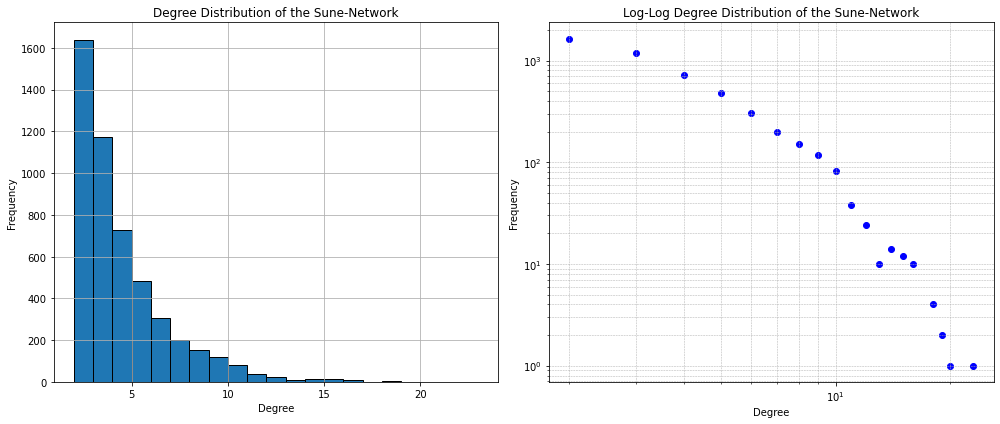

In [29]:
import networkx as nx
import random
import matplotlib.pyplot as plt
from collections import Counter

# Parameters
n = 5000  # Number of nodes
m = 4     # Number of edges each new node will create (i.e., average degree / 2)

# Initialize the graph with two connected nodes
G = nx.Graph()
G.add_edge(0, 1)

# List of nodes in the graph
nodes = list(G.nodes)

# Add nodes to the graph
for new_node in range(2, n):
    G.add_node(new_node)
    
    # Ensure we don't sample more nodes than available
    if len(nodes) < m:
        m = len(nodes)
    
    # Choose m existing nodes uniformly at random
    existing_nodes = random.sample(nodes, m)
    
    # Connect the new node to these existing nodes
    for node in existing_nodes:
        G.add_edge(new_node, node)
    
    # Update the list of nodes
    nodes.append(new_node)

# Compute degree statistics
degrees = dict(G.degree())
degree_values = list(degrees.values())

# Plot the degree distribution as a histogram
plt.figure(figsize=(14, 6))

# Histogram plot
plt.subplot(1, 2, 1)
plt.hist(degree_values, bins=range(min(degree_values), max(degree_values) + 1), edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of the Sune-Network')
plt.grid(True)

# Calculate degree frequency
degree_count = Counter(degree_values)
deg, counts = zip(*degree_count.items())

# Scatter plot with log-log axes
plt.subplot(1, 2, 2)
plt.scatter(deg, counts, color='blue', marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Log-Log Degree Distribution of the Sune-Network')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.tight_layout()
plt.show()


>  2. Generate an ER network of same number of nodes and links as the Sune-network. 
> * What are the differences between the ER network and the Sune-network? Explain in your own words. 
>   * *Hints*: To get started, plot the two degree distribution in the same plot. Compare and contrast. Another revealing network property to study is the the number of connected components.

<div class="alert alert-block alert-info">
Feel free to go nuts in asking an LLM to help you for this last exercise.
</div>

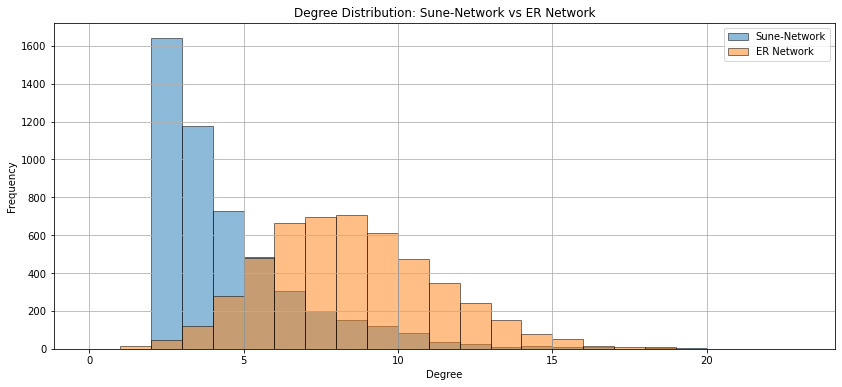

In [31]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Parameters
n = 5000  # Number of nodes (same as Sune-network)
p = (2 * 4) / (n - 1)  # Probability for ER network to match the number of edges

# Generate ER network
ER_G = nx.erdos_renyi_graph(n, p)

# Compute degree statistics
ER_degrees = dict(ER_G.degree())
ER_degree_values = list(ER_degrees.values())

# Plot degree distributions
plt.figure(figsize=(14, 6))

# Sune-network degree distribution (already computed)
plt.hist(degree_values, bins=range(min(degree_values), max(degree_values) + 1), alpha=0.5, label='Sune-Network', edgecolor='black')

# ER network degree distribution
plt.hist(ER_degree_values, bins=range(min(ER_degree_values), max(ER_degree_values) + 1), alpha=0.5, label='ER Network', edgecolor='black')

plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution: Sune-Network vs ER Network')
plt.legend()
plt.grid(True)
plt.show()


Number of connected components in Sune-Network: 1
Number of connected components in ER Network: 2


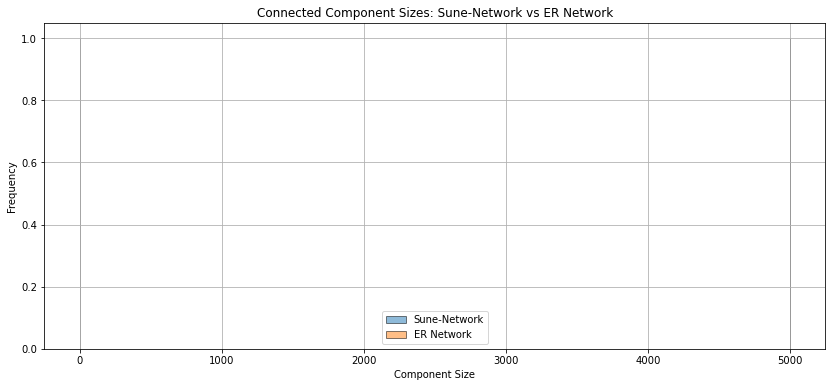

In [33]:
import matplotlib.pyplot as plt
import networkx as nx

# Generate or use previously defined networks
# G and ER_G should be defined earlier in your code

# Calculate number of connected components
num_components_sune = nx.number_connected_components(G)
num_components_er = nx.number_connected_components(ER_G)

print(f"Number of connected components in Sune-Network: {num_components_sune}")
print(f"Number of connected components in ER Network: {num_components_er}")

# Optionally, plot the size of connected components
sune_component_sizes = [len(c) for c in nx.connected_components(G)]
er_component_sizes = [len(c) for c in nx.connected_components(ER_G)]

# Check if component sizes lists are empty
if sune_component_sizes and er_component_sizes:
    # Plot connected component sizes
    plt.figure(figsize=(14, 6))
    
    # Define bin range based on component sizes
    min_size = min(min(sune_component_sizes, default=0), min(er_component_sizes, default=0))
    max_size = max(max(sune_component_sizes, default=0), max(er_component_sizes, default=0))
    
    # Plot component sizes for Sune-network
    plt.hist(sune_component_sizes, bins=range(min_size, max_size + 1), alpha=0.5, label='Sune-Network', edgecolor='black')

    # Plot component sizes for ER network
    plt.hist(er_component_sizes, bins=range(min_size, max_size + 1), alpha=0.5, label='ER Network', edgecolor='black')

    plt.xlabel('Component Size')
    plt.ylabel('Frequency')
    plt.title('Connected Component Sizes: Sune-Network vs ER Network')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Component size lists are empty. Please check if the networks were generated correctly.")
